In [45]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector
from imblearn.over_sampling import SMOTE
import pickle

In [46]:
data_desc=pd.read_csv('/content/drive/MyDrive/Datasets - Luminar/Logistics Delivery Delay Prediction/incom2024_delay_variable_description.csv')
data_desc

,variable_name,type,description
0,payment_type,categorical,Type of transaction made
1,profit_per_order,numerical,Earnings per order placed
2,sales_per_customer,numerical,Total sales per customer made per customer
3,category_id,numerical,Product category code
4,category_name,text,Description of the product category
5,customer_city,categorical,City where the customer made the purchase
6,customer_country,categorical,Country where the customer made the purchase
7,customer_id,numerical,Customer ID
8,customer_segment,categorical,"Types of Customers Consumer, Corporate, Home O..."
9,customer_state,categorical,State to which the store where the purchase is...


In [47]:
data=pd.read_csv('/content/drive/MyDrive/Datasets - Luminar/Logistics Delivery Delay Prediction/incom2024_delay_example_dataset (1).csv')
data.head(5)

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.0,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,...,Central America,Santa Ana,PROCESSING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1


In [48]:
data.columns

Index(['payment_type', 'profit_per_order', 'sales_per_customer', 'category_id',
       'category_name', 'customer_city', 'customer_country', 'customer_id',
       'customer_segment', 'customer_state', 'customer_zipcode',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id', 'order_date',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total_amount', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_date', 'shipping_mode',
       'label'],
      dtype='object')

In [49]:
data.isna().sum()

,0
payment_type,0
profit_per_order,0
sales_per_customer,0
category_id,0
category_name,0
customer_city,0
customer_country,0
customer_id,0
customer_segment,0
customer_state,0


In [50]:
data.dtypes

,0
payment_type,object
profit_per_order,float64
sales_per_customer,float64
category_id,float64
category_name,object
customer_city,object
customer_country,object
customer_id,float64
customer_segment,object
customer_state,object


In [51]:
order_product_counts = data.groupby('order_id')['product_card_id'].nunique().reset_index()
order_product_counts.rename(columns={'product_card_id': 'num_products'}, inplace=True)
print(order_product_counts['num_products'].describe())


count    15536.000000
mean         1.000772
std          0.027782
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: num_products, dtype: float64


⚡Almost all orders have only one product, with a max of two. Hence, each row represents a single transaction.


In [52]:
data['order_item_quantity'] = data['order_item_quantity'].round().astype(int)

In [53]:
data['shipping_date'].describe()

,shipping_date
count,15549
unique,1170
top,2015-05-20 00:00:00+01:00
freq,52


In [54]:
data['shipping_date'] = pd.to_datetime(data['shipping_date'], utc=True, errors='coerce').dt.date
data['order_date'] = pd.to_datetime(data['order_date'], utc=True, errors='coerce').dt.date

data['date_diff'] = (pd.to_datetime(data['shipping_date']) -
                     pd.to_datetime(data['order_date'])).dt.days

data.head(5)

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label,date_diff
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Vienna,COMPLETE,191.0,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-12,Standard Class,-1,1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,Buenos Aires,PENDING,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-08,Standard Class,-1,57
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18,Second Class,1,76
3,TRANSFER,-89.463196,99.15065,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,...,Santa Ana,PROCESSING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18,Second Class,0,-73
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Illinois,COMPLETE,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-29,Standard Class,1,1


In [55]:
data[data['date_diff'] < 0][['order_date','shipping_date','date_diff','order_status']]


,order_date,shipping_date,date_diff,order_status
3,2017-05-30,2017-03-18,-73,PROCESSING
7,2016-06-08,2016-04-23,-46,PROCESSING
9,2017-08-28,2017-04-27,-123,PENDING_PAYMENT
10,2017-08-28,2017-06-29,-60,ON_HOLD
12,2015-09-08,2015-09-06,-2,COMPLETE
...,...,...,...,...
15530,2015-04-07,2015-03-27,-11,CLOSED
15532,2015-12-04,2015-11-09,-25,COMPLETE
15535,2016-08-06,2016-05-11,-87,PENDING_PAYMENT
15538,2015-10-24,2015-03-18,-220,COMPLETE


In [56]:
data[data['date_diff'] < 0]['date_diff'].describe()

,date_diff
count,5941.000000
mean,-72.204343
std,86.886781
min,-1429.000000
25%,-100.000000
50%,-40.000000
75%,-15.000000
max,-1.000000


In [57]:
data['label'].value_counts()

,count
label,
1,8976
-1,3545
0,3028


In [58]:
data[data['date_diff'] < -1]['label'].value_counts()

,count
label,
1,3337
-1,1280
0,1200


In [59]:
def cleanDateDiff(diff):
  if diff>=0:
    return diff
  elif diff==-1:
    return 1
  else:
    return None

data['date_diff'] = data['date_diff'].apply(cleanDateDiff)
data = data.dropna(subset=['date_diff'])
data = data[data['date_diff'] <= 400]
data

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label,date_diff
0,DEBIT,34.448338,92.490990,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Vienna,COMPLETE,191.00000,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-12,Standard Class,-1,1.0
1,TRANSFER,91.193540,181.990080,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,Buenos Aires,PENDING,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-08,Standard Class,-1,57.0
2,DEBIT,8.313806,89.966430,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.00000,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18,Second Class,1,76.0
4,DEBIT,44.722590,170.978240,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Illinois,COMPLETE,1073.00000,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-29,Standard Class,1,1.0
5,CASH,76.100400,137.453600,17.0,Electronics,Caguas,Puerto Rico,5048.3975,Consumer,PR,...,Pennsylvania,CLOSED,209.90128,9.0,Under Armour Women's Ignite PIP VI Slide,39.99,2016-10-13,Standard Class,1,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15543,TRANSFER,62.439583,195.990000,17.0,Cleats,Caguas,Puerto Rico,4683.0527,Home Office,PR,...,Oklahoma,PENDING,365.00000,17.0,Perfect Fitness Perfect Rip Deck,59.99,2016-05-18,Standard Class,0,25.0
15544,DEBIT,108.042500,359.980000,45.0,Fishing,Caguas,Puerto Rico,8333.1170,Consumer,PR,...,Managua,COMPLETE,1004.00000,45.0,Field & Stream Sportsman 16 Gun Fire Safe,399.98,2017-04-02,Standard Class,1,0.0
15545,DEBIT,22.480274,169.990000,46.0,Indoor/Outdoor Games,Caguas,Puerto Rico,3182.7766,Consumer,PR,...,Yucatan,COMPLETE,1014.00000,46.0,O'Brien Men's Neoprene Life Vest,49.98,2017-06-04,Standard Class,-1,90.0
15547,TRANSFER,-23.254063,49.973537,17.0,Cleats,Caguas,Puerto Rico,1953.6525,Consumer,PR,...,West Java,PENDING,365.00000,17.0,Perfect Fitness Perfect Rip Deck,59.99,2016-04-06,Standard Class,1,66.0


In [60]:
data=data[data['customer_state']!='91732']

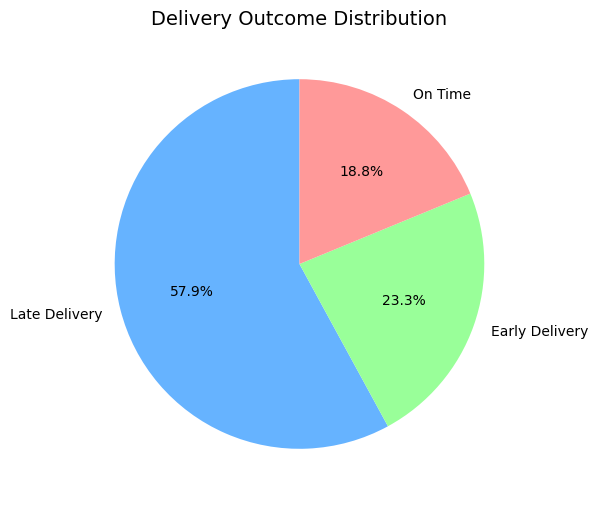

In [61]:
label_map = {-1: 'Early Delivery', 0: 'On Time', 1: 'Late Delivery'}

label_counts = data['label'].map(label_map).value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ff9999']
)
plt.title('Delivery Outcome Distribution', fontsize=14)
plt.show()


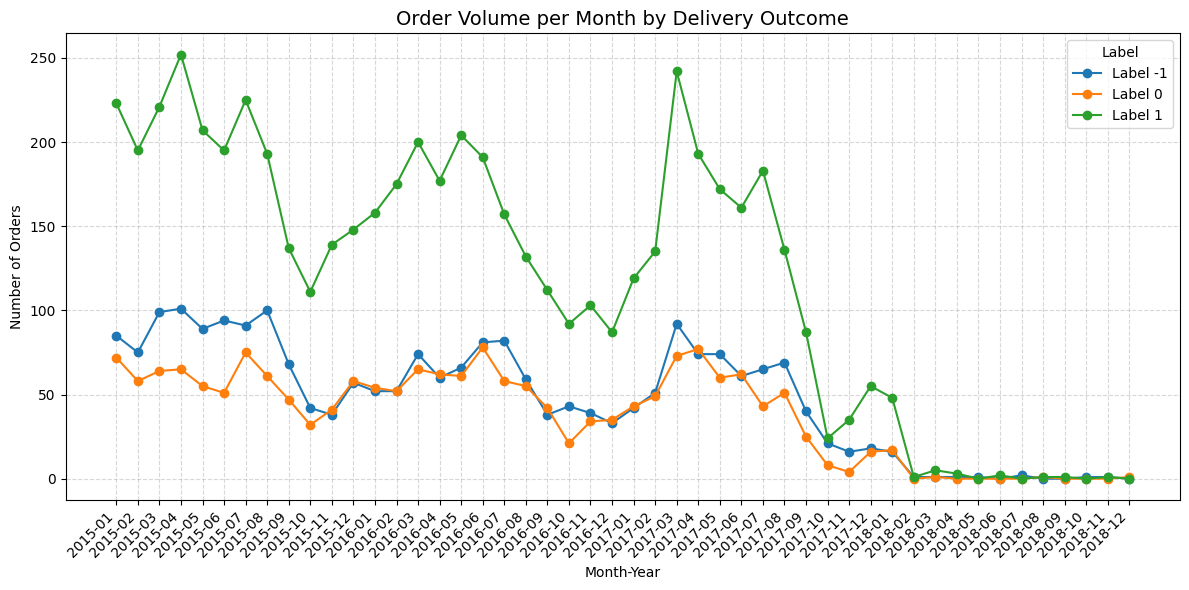

In [62]:
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')

data['month_year'] = data['order_date'].dt.to_period('M')

monthly_counts = data.groupby(['month_year', 'label']).size().unstack(fill_value=0)

monthly_counts = monthly_counts.sort_index()

plt.figure(figsize=(12,6))
for label in monthly_counts.columns:
    plt.plot(monthly_counts.index.astype(str), monthly_counts[label], marker='o', label=f'Label {label}')

plt.title('Order Volume per Month by Delivery Outcome', fontsize=14)
plt.xlabel('Month-Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

⚡The dataset contains more instances of late delivery than the other two classes. The volume of deliveries always reduce during Aug-Nov window and then gradually increases to a peak in Jan-March.

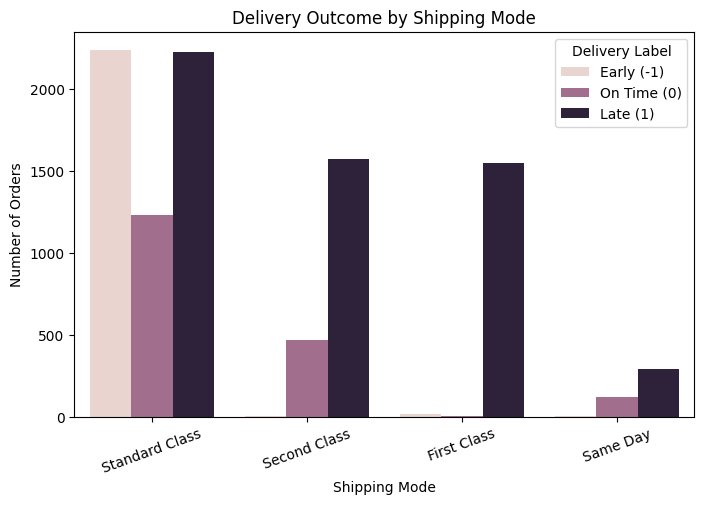

In [63]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='shipping_mode', hue='label')
plt.title('Delivery Outcome by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.legend(title='Delivery Label', labels=['Early (-1)', 'On Time (0)', 'Late (1)'])
plt.xticks(rotation=20)
plt.show()

⚡In standard class shipping mode, the chances of early delivery and late delivery look almost same. There are almost no chances of getting an early delivery in the secon, first classes or same day delivery. Though the volume of late deliveries look almost same in first and second class, the chances of getting an on-time delivery is more in second class. Standard class delivery has the most probability of delivering an on time delivery.

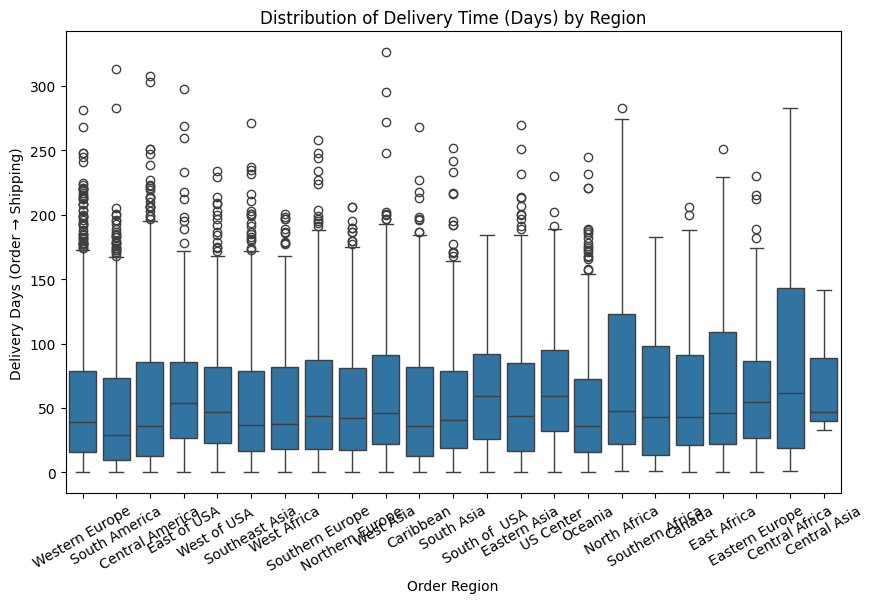

In [64]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='order_region', y='date_diff')
plt.title('Distribution of Delivery Time (Days) by Region')
plt.xlabel('Order Region')
plt.ylabel('Delivery Days (Order → Shipping)')
plt.xticks(rotation=30)
plt.show()

⚡Some regions like Western Europe, South Americs, Central America, Oceania and Northern Europe show a large no of outliers, indicating presence of cases with unusually large delivery time.

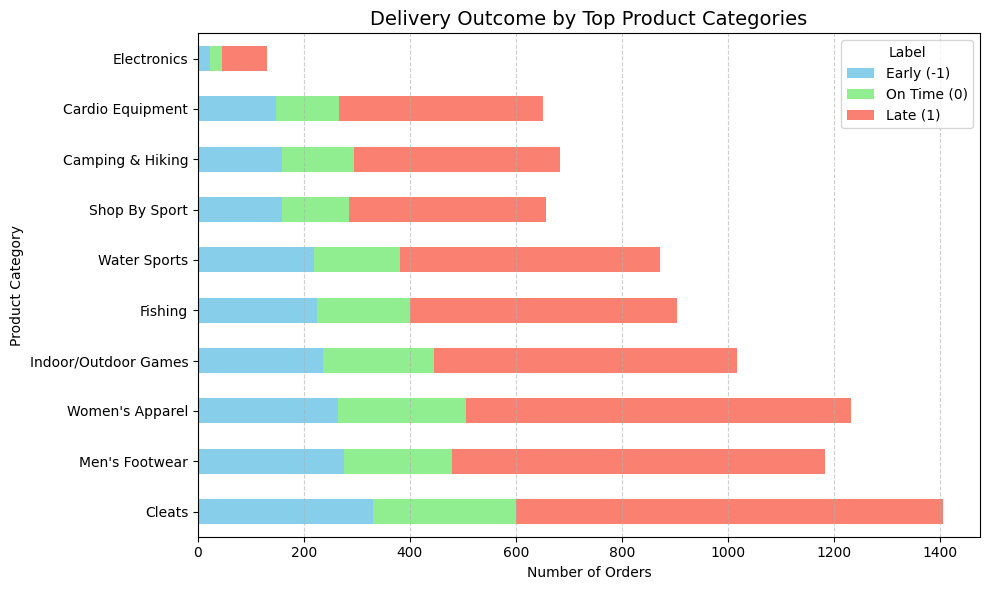

In [65]:
top_cats = data['category_name'].value_counts().nlargest(10).index
subset = data[data['category_name'].isin(top_cats)]

pivot_df = subset.pivot_table(index='category_name', columns='label', aggfunc='size', fill_value=0)

pivot_df = pivot_df.sort_values(by=pivot_df.columns.tolist(), ascending=False)

pivot_df.plot(kind='barh', stacked=True, figsize=(10,6), color=['skyblue', 'lightgreen', 'salmon'])

plt.title('Delivery Outcome by Top Product Categories', fontsize=14)
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.legend(title='Label', labels=['Early (-1)', 'On Time (0)', 'Late (1)'], loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

⚡The largest number of orders are placed on Cleats, then Men's Footwear and then Women's Apparel. From the graph, the chances of late delivery follows that order too. But, the chances of on-time delivery slightly greater for Women's Apparel than Men's Footwear

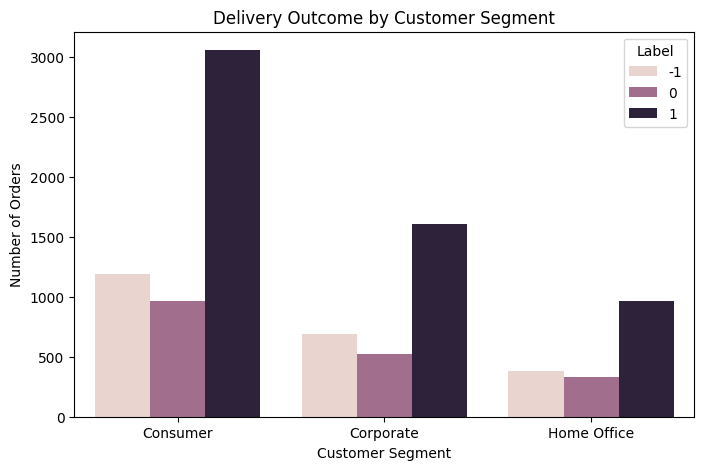

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='customer_segment', hue='label')
plt.title('Delivery Outcome by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Orders')
plt.legend(title='Label')
plt.show()

⚡The larger no of deliveries are consumers and as expected, they have the highest no of late deliveries, followed by corporate customer segment.

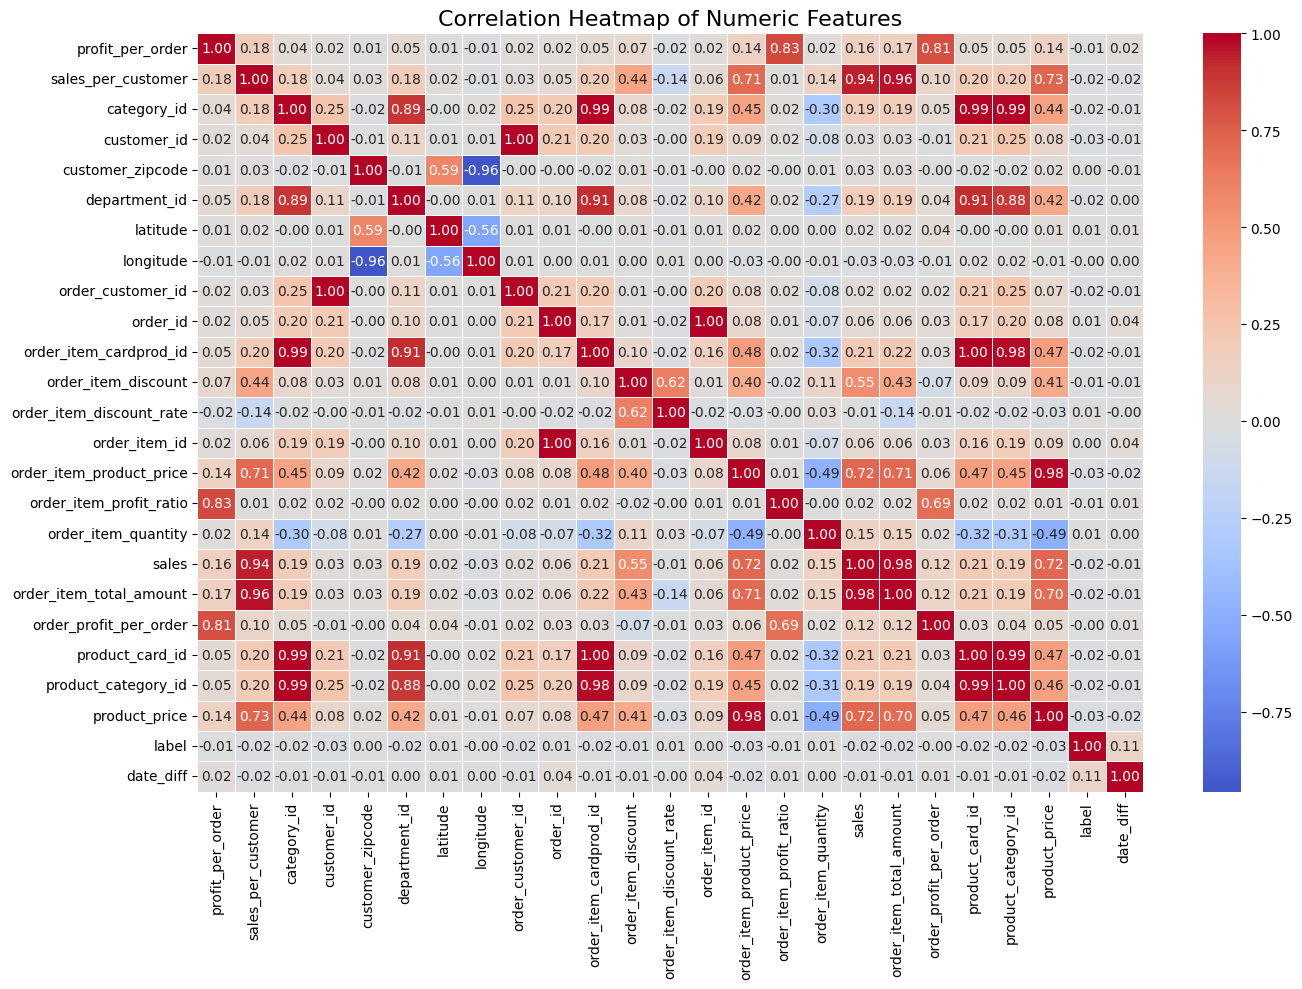

In [67]:
numeric_data = data.select_dtypes(include=['number'])

corr = numeric_data.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)

plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()


⚡As expected, the column with the greatest correlation with label column is date_diff.

In [68]:
id_cols = ['customer_id', 'order_id', 'order_customer_id', 'order_item_id','order_item_cardprod_id', 'product_card_id', 'product_category_id','category_id', 'department_id']
data = data.drop(columns=id_cols, errors='ignore')

In [69]:
numeric_data = data.select_dtypes(include=['number'])

corr_matrix = numeric_data.corr().abs()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = [
    (col, row, upper_tri.loc[row, col])
    for col in upper_tri.columns
    for row in upper_tri.index
    if upper_tri.loc[row, col] > 0.5
]

high_corr_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
print(high_corr_df)


                   Feature 1                 Feature 2  Correlation
0              product_price  order_item_product_price     0.978489
1    order_item_total_amount                     sales     0.978271
2    order_item_total_amount        sales_per_customer     0.963990
3                  longitude          customer_zipcode     0.956448
4                      sales        sales_per_customer     0.944606
5    order_item_profit_ratio          profit_per_order     0.827761
6     order_profit_per_order          profit_per_order     0.807777
7              product_price        sales_per_customer     0.731589
8                      sales  order_item_product_price     0.724705
9              product_price                     sales     0.717996
10   order_item_total_amount  order_item_product_price     0.710906
11  order_item_product_price        sales_per_customer     0.710367
12             product_price   order_item_total_amount     0.699962
13    order_profit_per_order   order_item_profit

In [70]:
cols_to_drop = ['order_item_product_price','sales','sales_per_customer','latitude','longitude','order_profit_per_order','customer_zipcode','order_date', 'shipping_date', 'month_year']
data = data.drop(columns=cols_to_drop, errors='ignore')
len(data.columns)

24

In [71]:
encoders = [LabelEncoder() for i in list(data.select_dtypes(include='object'))]
encoders

[LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder(),
 LabelEncoder()]

In [72]:
obj_cols=list(data.select_dtypes(include='object'))
for i,col in enumerate(obj_cols):
  data[col]=encoders[i].fit_transform(data[col])
  # print(encoders[i].classes_)

In [73]:
label_enc=LabelEncoder()
data['label'] = label_enc.fit_transform(data['label'])
label_enc.classes_

array([-1,  0,  1])

In [74]:
corr_with_label = data.corr(numeric_only=True)['label'].sort_values(ascending=False)
print(corr_with_label)

label                       1.000000
date_diff                   0.111066
order_item_discount_rate    0.012446
department_name             0.010456
category_name               0.010345
order_state                 0.010021
order_status                0.008709
customer_city               0.008506
order_item_quantity         0.008403
market                      0.006663
product_name                0.006322
order_country               0.003236
payment_type                0.002596
order_region               -0.002488
customer_country           -0.005330
order_item_profit_ratio    -0.005552
profit_per_order           -0.007768
customer_state             -0.009263
order_item_discount        -0.009494
customer_segment           -0.010563
order_city                 -0.017047
order_item_total_amount    -0.020857
product_price              -0.026051
shipping_mode              -0.457540
Name: label, dtype: float64


In [75]:
y = data['label']
X = data.drop(columns=['label'])

In [76]:
sc=MinMaxScaler()
X_sc=sc.fit_transform(X)
X_sc

array([[0.33333333, 0.70025083, 0.20833333, ..., 0.04522613, 1.        ,
        0.00306748],
       [1.        , 0.71963796, 0.9375    , ..., 0.09547739, 1.        ,
        0.17484663],
       [0.33333333, 0.69132191, 0.60416667, ..., 0.02009548, 0.66666667,
        0.23312883],
       ...,
       [0.33333333, 0.69616192, 0.60416667, ..., 0.02009548, 1.        ,
        0.27607362],
       [1.        , 0.68053668, 0.25      , ..., 0.02512563, 1.        ,
        0.20245399],
       [1.        , 0.74922407, 0.20833333, ..., 0.04522613, 0.66666667,
        0.46625767]])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6811, 23)
X_test shape: (2919, 23)
y_train shape: (6811,)
y_test shape: (2919,)


In [78]:
gnb=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=7)
svc=SVC(kernel='poly')
dt=DecisionTreeClassifier(criterion='gini')
rf=RandomForestClassifier(random_state=1)
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
models=[gnb,knn,svc,dt,rf,abc,gbc,xgb]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("Accuracy:", round(model.score(X_test, y_test),5))
  # print(classification_report(y_test,y_pred))
  print("*"*75)

GaussianNB()
Accuracy: 0.62179
***************************************************************************
KNeighborsClassifier(n_neighbors=7)
Accuracy: 0.54608
***************************************************************************
SVC(kernel='poly')
Accuracy: 0.62282
***************************************************************************
DecisionTreeClassifier()
Accuracy: 0.55807
***************************************************************************
RandomForestClassifier(random_state=1)
Accuracy: 0.62761
***************************************************************************
AdaBoostClassifier()
Accuracy: 0.62967
***************************************************************************
GradientBoostingClassifier()
Accuracy: 0.6259
***************************************************************************
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, de

In [79]:
base_learners = [abc,abc,abc]
meta_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000 )

stacking_model = StackingClassifier(classifiers=base_learners, meta_classifier=meta_model, use_probas=True)

model_stack = stacking_model.fit(X_train, y_train)
pred_stack = model_stack.predict(X_test)

acc_stack = accuracy_score(y_test, pred_stack)
print('Accuracy Score of Stacked Model:', acc_stack * 100)

Accuracy Score of Stacked Model: 62.829736211031175


In [80]:
# params={"n_estimators": [50, 100, 200, 300, 500],
#         "learning_rate":[0.01, 0.05, 0.1, 0.5, 1.0],
#         "random_state":[42,1]}

# clf=GridSearchCV(abc,params,cv=10,scoring='f1_macro')
# clf.fit(X_train,y_train)
# clf.best_params_

In [81]:
# y_pred=clf.predict(X_test)
# print("New Accuracy: ",round(accuracy_score(y_test,y_pred),7)*100)
# print(classification_report(y_test,y_pred))

# Same accuracy 64%

In [82]:
feature_importances = xgb.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)
print(feature_importance_df.to_string(index=False))

                 feature  importance
           shipping_mode    0.457263
               date_diff    0.043813
           category_name    0.025745
 order_item_profit_ratio    0.025560
 order_item_total_amount    0.025427
        customer_country    0.025258
     order_item_discount    0.024569
              order_city    0.024561
           order_country    0.024409
           customer_city    0.024371
          customer_state    0.024301
        profit_per_order    0.024298
             order_state    0.024001
order_item_discount_rate    0.023794
        customer_segment    0.023615
                  market    0.023516
     order_item_quantity    0.023092
           product_price    0.022864
            order_region    0.022828
            order_status    0.022661
         department_name    0.021811
            product_name    0.021187
            payment_type    0.021054


In [83]:
# backward_feature_selector = SequentialFeatureSelector(rf,
#                                                       k_features=(1,23),
#                                                       forward=False,
#                                                       floating=False,
#                                                       verbose=2,
#                                                       scoring="accuracy",
#                                                       cv=3).fit(X_train,y_train)
# selected_features = list(backward_feature_selector.k_feature_idx_)
# selected_features

selected_features=[0, 2, 9, 13, 14, 15, 17, 18, 21, 22]

# output: [0, 2, 9, 13, 14, 15, 17, 18, 21, 22]

In [84]:
selected_feature_names = X.columns[selected_features]

print("Selected features:")
print(selected_feature_names)

Selected features:
Index(['payment_type', 'category_name', 'order_city',
       'order_item_profit_ratio', 'order_item_quantity',
       'order_item_total_amount', 'order_state', 'order_status',
       'shipping_mode', 'date_diff'],
      dtype='object')


In [85]:
X1=data[selected_feature_names]
X1

,payment_type,category_name,order_city,order_item_profit_ratio,order_item_quantity,order_item_total_amount,order_state,order_status,shipping_mode,date_diff
0,1,10,2203,0.410000,1,84.991570,845,1,3,1.0
1,3,45,332,0.480000,1,181.990000,140,4,3,57.0
2,1,29,344,0.090000,2,93.810150,591,1,2,76.0
4,1,45,273,0.270000,1,171.075870,367,1,3,1.0
5,0,17,1648,0.490000,4,145.463290,643,0,3,130.0
...,...,...,...,...,...,...,...,...,...,...
15543,3,12,126,0.300000,4,199.999510,615,4,3,25.0
15544,1,18,1297,0.286839,1,371.966370,494,1,3,0.0
15545,1,29,815,0.114995,4,169.990000,881,1,3,90.0
15547,3,12,176,-0.323644,1,52.259182,862,4,3,66.0


In [86]:
sc=MinMaxScaler()
X1_sc=sc.fit_transform(X1)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X1_sc, y, test_size=0.3, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6811, 10)
X_test shape: (2919, 10)
y_train shape: (6811,)
y_test shape: (2919,)


In [88]:
gnb=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=7)
svc=SVC(kernel='poly')
dt=DecisionTreeClassifier(criterion='gini')
rf=RandomForestClassifier(random_state=1)
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
models=[gnb,knn,svc,dt,rf,abc,gbc,xgb]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("Accuracy:", round(model.score(X_test, y_test),5))
  # print(classification_report(y_test,y_pred))
  print("*"*75)

GaussianNB()
Accuracy: 0.62967
***************************************************************************
KNeighborsClassifier(n_neighbors=7)
Accuracy: 0.58445
***************************************************************************
SVC(kernel='poly')
Accuracy: 0.63378
***************************************************************************
DecisionTreeClassifier()
Accuracy: 0.54025
***************************************************************************
RandomForestClassifier(random_state=1)
Accuracy: 0.61425
***************************************************************************
AdaBoostClassifier()
Accuracy: 0.62967
***************************************************************************
GradientBoostingClassifier()
Accuracy: 0.62795
***************************************************************************
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, d

In [89]:
base_learners = [abc,abc,abc]
meta_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000 )

stacking_model = StackingClassifier(classifiers=base_learners, meta_classifier=meta_model, use_probas=True)

model_stack = stacking_model.fit(X_train, y_train)
pred_stack = model_stack.predict(X_test)

acc_stack = accuracy_score(y_test, pred_stack)
print('Accuracy Score of Stacked Model:', acc_stack * 100)

Accuracy Score of Stacked Model: 62.829736211031175


In [90]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X1,y)
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=42)
for model in models:
  print(model)
  model.fit(X_train_os,y_train_os)
  y_pred_os = model.predict(X_test_os)
  print("Accuracy:", round(model.score(X_test_os, y_test_os),5))
  # print(classification_report(y_test_os,y_pred_os))
  print("*"*100)

GaussianNB()
Accuracy: 0.6201
****************************************************************************************************
KNeighborsClassifier(n_neighbors=7)
Accuracy: 0.5667
****************************************************************************************************
SVC(kernel='poly')
Accuracy: 0.37793
****************************************************************************************************
DecisionTreeClassifier()
Accuracy: 0.62581
****************************************************************************************************
RandomForestClassifier(random_state=1)
Accuracy: 0.71251
****************************************************************************************************
AdaBoostClassifier()
Accuracy: 0.62916
****************************************************************************************************
GradientBoostingClassifier()
Accuracy: 0.653
******************************************************************************************

In [91]:
base_learners = [xgb,xgb,rf,xgb,xgb,rf]
meta_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000 )

stacking_model = StackingClassifier(classifiers=base_learners, meta_classifier=meta_model, use_probas=True)

model_stack = stacking_model.fit(X_train_os, y_train_os)
pred_stack_os = model_stack.predict(X_test_os)

acc_stack_os = accuracy_score(y_test_os, pred_stack_os)
print('Accuracy Score of Stacked Model:', acc_stack_os * 100)  #72.75

Accuracy Score of Stacked Model: 72.03940886699507


In [92]:
# pickle.dump(model_stack,open('model_logistics.sav','wb'))

In [93]:
# Index(['payment_type', 'category_name', 'order_city',
#        'order_item_profit_ratio', 'order_item_quantity',
#        'order_item_total_amount', 'order_state', 'order_status',
#        'shipping_mode', 'date_diff'],
#       dtype='object')

# data['date_diff'].unique()

In [94]:
unique_cities = sorted(data['order_city'].dropna().unique())
pd.Series(unique_cities).to_csv("cities.csv", index=False, header=False)

In [95]:
unique_categories = sorted(data['category_name'].dropna().unique())
pd.Series(unique_categories).to_csv("categories.csv", index=False, header=False)

In [96]:
unique_states = sorted(data['order_state'].dropna().unique())
pd.Series(unique_states).to_csv("states.csv", index=False, header=False)

In [97]:
X2 = pd.concat([X1, data[['market', 'customer_state']]], axis=1)
X2

,payment_type,category_name,order_city,order_item_profit_ratio,order_item_quantity,order_item_total_amount,order_state,order_status,shipping_mode,date_diff,market,customer_state
0,1,10,2203,0.410000,1,84.991570,845,1,3,1.0,1,33
1,3,45,332,0.480000,1,181.990000,140,4,3,57.0,2,2
2,1,29,344,0.090000,2,93.810150,591,1,2,76.0,1,33
4,1,45,273,0.270000,1,171.075870,367,1,3,1.0,2,2
5,0,17,1648,0.490000,4,145.463290,643,0,3,130.0,4,33
...,...,...,...,...,...,...,...,...,...,...,...,...
15543,3,12,126,0.300000,4,199.999510,615,4,3,25.0,4,33
15544,1,18,1297,0.286839,1,371.966370,494,1,3,0.0,2,33
15545,1,29,815,0.114995,4,169.990000,881,1,3,90.0,2,33
15547,3,12,176,-0.323644,1,52.259182,862,4,3,66.0,3,33


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6811, 12)
X_test shape: (2919, 12)
y_train shape: (6811,)
y_test shape: (2919,)


In [99]:
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("Accuracy:", round(model.score(X_test, y_test),5))
  # print(classification_report(y_test,y_pred))
  print("*"*75)

GaussianNB()
Accuracy: 0.62967
***************************************************************************
KNeighborsClassifier(n_neighbors=7)
Accuracy: 0.49435
***************************************************************************
SVC(kernel='poly')
Accuracy: 0.58924
***************************************************************************
DecisionTreeClassifier()
Accuracy: 0.54573
***************************************************************************
RandomForestClassifier(random_state=1)
Accuracy: 0.61802
***************************************************************************
AdaBoostClassifier()
Accuracy: 0.62967
***************************************************************************
GradientBoostingClassifier()
Accuracy: 0.6211
***************************************************************************
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, de

In [100]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X2,y)
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=42)
for model in models:
  print(model)
  model.fit(X_train_os,y_train_os)
  y_pred_os = model.predict(X_test_os)
  print("Accuracy:", round(model.score(X_test_os, y_test_os),5))
  # print(classification_report(y_test_os,y_pred_os))
  print("*"*100)

GaussianNB()
Accuracy: 0.61892
****************************************************************************************************
KNeighborsClassifier(n_neighbors=7)
Accuracy: 0.57005
****************************************************************************************************
SVC(kernel='poly')
Accuracy: 0.37911
****************************************************************************************************
DecisionTreeClassifier()
Accuracy: 0.62562
****************************************************************************************************
RandomForestClassifier(random_state=1)
Accuracy: 0.72079
****************************************************************************************************
AdaBoostClassifier()
Accuracy: 0.63665
****************************************************************************************************
GradientBoostingClassifier()
Accuracy: 0.65714
**************************************************************************************

In [101]:
base_learners = [xgb,xgb,rf,xgb,xgb,rf]
meta_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000 )

stacking_model = StackingClassifier(classifiers=base_learners, meta_classifier=meta_model, use_probas=True)

model_stack = stacking_model.fit(X_train_os, y_train_os)
pred_stack_os = model_stack.predict(X_test_os)

acc_stack_os = accuracy_score(y_test_os, pred_stack_os)
print('Accuracy Score of Stacked Model:', acc_stack_os * 100)  #73

Accuracy Score of Stacked Model: 73.08374384236454


In [102]:
X2=X2.drop(columns=['order_item_profit_ratio'])
X2=pd.concat([X2,data[['order_item_discount','department_name']]],axis=1)
X2

,payment_type,category_name,order_city,order_item_quantity,order_item_total_amount,order_state,order_status,shipping_mode,date_diff,market,customer_state,order_item_discount,department_name
0,1,10,2203,1,84.991570,845,1,3,1.0,1,33,12.623338,5
1,3,45,332,1,181.990000,140,4,3,57.0,2,2,16.500000,3
2,1,29,344,2,93.810150,591,1,2,76.0,1,33,6.600000,3
4,1,45,273,1,171.075870,367,1,3,1.0,2,2,29.990000,3
5,0,17,1648,4,145.463290,643,0,3,130.0,4,33,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15543,3,12,126,4,199.999510,615,4,3,25.0,4,33,32.015774,0
15544,1,18,1297,1,371.966370,494,1,3,0.0,2,33,36.454994,3
15545,1,29,815,4,169.990000,881,1,3,90.0,2,33,22.100000,3
15547,3,12,176,1,52.259182,862,4,3,66.0,3,33,9.100000,0


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6811, 13)
X_test shape: (2919, 13)
y_train shape: (6811,)
y_test shape: (2919,)


In [104]:
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("Accuracy:", round(model.score(X_test, y_test),5))
  # print(classification_report(y_test,y_pred))
  print("*"*75)

GaussianNB()
Accuracy: 0.62453
***************************************************************************
KNeighborsClassifier(n_neighbors=7)
Accuracy: 0.50531
***************************************************************************
SVC(kernel='poly')
Accuracy: 0.58924
***************************************************************************
DecisionTreeClassifier()
Accuracy: 0.56218
***************************************************************************
RandomForestClassifier(random_state=1)
Accuracy: 0.61733
***************************************************************************
AdaBoostClassifier()
Accuracy: 0.62967
***************************************************************************
GradientBoostingClassifier()
Accuracy: 0.62556
***************************************************************************
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, d

In [105]:
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X2,y)
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=42)
for model in models:
  print(model)
  model.fit(X_train_os,y_train_os)
  y_pred_os = model.predict(X_test_os)
  print("Accuracy:", round(model.score(X_test_os, y_test_os),5))
  # print(classification_report(y_test_os,y_pred_os))
  print("*"*100)

GaussianNB()
Accuracy: 0.61793
****************************************************************************************************
KNeighborsClassifier(n_neighbors=7)
Accuracy: 0.57182
****************************************************************************************************
SVC(kernel='poly')
Accuracy: 0.37813
****************************************************************************************************
DecisionTreeClassifier()
Accuracy: 0.61537
****************************************************************************************************
RandomForestClassifier(random_state=1)
Accuracy: 0.71764
****************************************************************************************************
AdaBoostClassifier()
Accuracy: 0.64079
****************************************************************************************************
GradientBoostingClassifier()
Accuracy: 0.6599
***************************************************************************************

In [106]:
base_learners = [xgb,xgb,rf,xgb,xgb,rf]
meta_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000 )

stacking_model = StackingClassifier(classifiers=base_learners, meta_classifier=meta_model, use_probas=True)

model_stack = stacking_model.fit(X_train_os, y_train_os)
pred_stack_os = model_stack.predict(X_test_os)

acc_stack_os = accuracy_score(y_test_os, pred_stack_os)
print('Accuracy Score of Stacked Model:', acc_stack_os * 100)  #73.41

Accuracy Score of Stacked Model: 73.41871921182266


In [107]:
pickle.dump(model_stack,open('model_logistics.sav','wb'))

In [108]:
X2.columns

Index(['payment_type', 'category_name', 'order_city', 'order_item_quantity',
       'order_item_total_amount', 'order_state', 'order_status',
       'shipping_mode', 'date_diff', 'market', 'customer_state',
       'order_item_discount', 'department_name'],
      dtype='object')

In [109]:
unique_cust_states = sorted(data['customer_state'].dropna().unique())
pd.Series(unique_cust_states).to_csv("cust_states.csv", index=False, header=False)

In [110]:
unique_depts = sorted(data['department_name'].dropna().unique())
pd.Series(unique_depts).to_csv("departments.csv", index=False, header=False)

In [111]:
data['market'].unique()

array([1, 2, 4, 3, 0])

In [112]:
city_state_df = data[['order_state', 'order_city']].dropna()
city_state_unique = city_state_df.drop_duplicates().sort_values(['order_state', 'order_city'])
city_state_unique.to_csv("state_city_pairs.csv", index=False)
